<a href="https://colab.research.google.com/github/GeeklurnAI/Deep-Learning-for-Semantic-Text-Matching/blob/main/Copy_of_predicting_fuel_efficiency_for_automobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align='center'style='font-size:40px'>Predicting Fuel Efficiency for AutoMobile</h1>

# Problem statement:
<br>&emsp;&emsp;In this notebook I am train an Artificial Neural Network(ANN) to give better estimates for MPG rates all over the automobile industry. The learning method involved is feedforward learning. Such calculation would help to reduce the efforts needed to design and analyze automobile fuel consumption with such limited factors “attributes (cylinders, displacement factor, horsepower, weight, acceleration, model year and origins of manufacturing).

# Attribute information:
**MPG**: The fuel economy of an automobile is the relationship between the distance traveled and the amount of fuel consumed by the vehicle. MPG is continuous from 9 to 48 (*Continuous*).
<br>**Cylinders**: A cylinder is the power unit of an engine; it's the chamber where the gasoline is burned and turned into power. Number of cylinder continuous from 3 to 8 (*Multi-Valued Discrete*)
<br>**Displacement**:Engine displacement is the measure of the cylinder volume swept by all of the pistons of a piston engine, excluding the combustion chambers. Displacement is continuous from 68 to 455 (*Continuous*)
<br>**Horsepower**: Horsepower is a unit of power used to measure the forcefulness of a vehicle's engine. Horse power continuous from 46 to 230 (*Continuous*).
<br>**Weight**: The weight of an object is related to the amount of force acting on the object, either due to gravity or to a reaction force that holds it in place. The weight of car continuous from 1613 to 5140 (*Continuous*).
<br>**Acceleration**: Is the rate of change of velocity of an object with respect to time. It continuous from 8 to 25 (*Continuous*).
<br>**Model Year**: Is the year in which product is manufactured. The year ranges from 1970 to 1982 (*Multi-Valued Discrete*)
<br>**Origin**: The Country which manufacturing the automobile. (*Multi-Valued Discrete*)
<br>&emsp;&emsp; **1**: USA
<br>&emsp;&emsp; **2**: GERMANY
<br>&emsp;&emsp; **3**: JAPAN

## Importing Neccesary Libraries

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers

print(tf.__version__)

2.3.1


## Importing the Datset

In [ ]:
#### Downloading the Dataset
dataset_path = keras.utils.get_file("auto-mpg.data", 
                                    "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

#### Loading dataset using Pandas
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin'] 
dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

#### Let's have a look at data
dataset.head()

32768/30286 [================================] - 0s 1us/step


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


## Performing appropriate exploratory data analysis technique to treat missing values, to visualize the required plot etc.

In [ ]:
#### Checking for duplicated data
dataset.duplicated().sum()

0

* **From the above it is clearly observed that there is no duplicate data present in dataset.**

In [ ]:
#### checking dimensionality of the dataset
print(f'The dataset contains {dataset.shape[0]} rows and {dataset.shape[1]} columns')

The dataset contains 398 rows and 8 columns


In [ ]:
#### Checking for datatype of each columns
dataset.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year        int64
Origin            int64
dtype: object

* **The dataset contains 5 columns as float datatype and 3 columns as integer datatpe.**

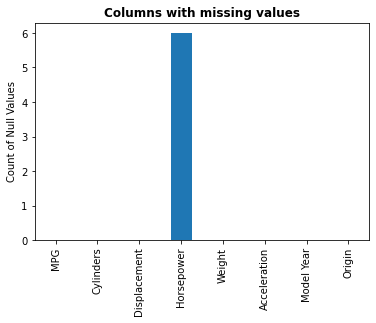

In [ ]:
#### Checking for null values
dataset.isnull().sum().plot(kind='bar')
plt.title('Columns with missing values',  fontweight="bold")
plt.ylabel('Count of Null Values')
plt.show()

* **From the above it is observed that the column `Horsepower` contains `6 null values`**.

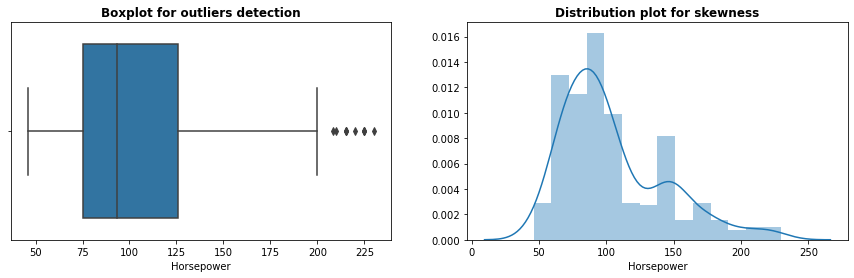

In [ ]:
#### Visualizing 'Horsepower' feature for outliers and skewnwss
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
sns.boxplot(x = dataset["Horsepower"])
plt.title("Boxplot for outliers detection", fontweight="bold")

plt.subplot(1, 2, 2)
sns.distplot(dataset["Horsepower"])
plt.title("Distribution plot for skewness", fontweight="bold")

plt.show()

* **From the above plots it is observed the `Horsepower` column contains `few outliers` in upper boundary and it is `Right Skewed`**. 
* **So `replacing null values with Median` instead of Mean**.

In [ ]:
#### Filling null values in 'Horsepower' column with median
dataset["Horsepower"].fillna(dataset["Horsepower"].median(), inplace = True)

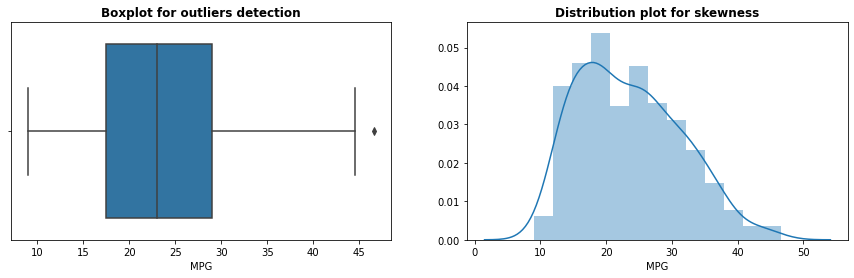

In [ ]:
#### visualizing our dependent variable for outliers and skewnwss
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
sns.boxplot(dataset["MPG"])
plt.title("Boxplot for outliers detection", fontweight="bold")

plt.subplot(1, 2, 2)
sns.distplot(dataset["MPG"])
plt.title("Distribution plot for skewness", fontweight="bold")

plt.show()

* **From the above it is observed that target variable is almost normally distributed.**

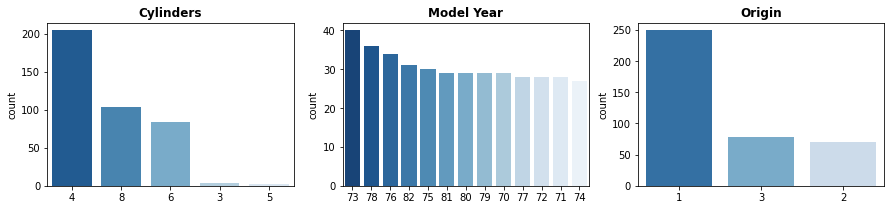

In [ ]:
#### Count plot for all discrete features
discrete_columns_list = ['Cylinders', 'Model Year', 'Origin']
plt.figure(figsize = (15, 3))
for i in range(len(discrete_columns_list)):
    plt.subplot(1, 3, i+1)
    sns.countplot(dataset[discrete_columns_list[i]], 
                  order = dataset[discrete_columns_list[i]].value_counts().index, 
                  palette='Blues_r')
    plt.title(discrete_columns_list[i], fontweight="bold")
    plt.xlabel('')

**From the above visuals:**
* **`Cylinders`: Most of the automobiles contains 4 cylinders.**
* **`Model Year`: The no of cars manufactured in the year 1973.**
* **`Origin`: Most of the automobiles are manufactured in USA.**  

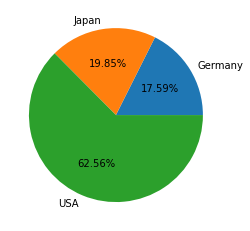

In [ ]:
#### Converting categorical variable in origin to actual values
dataset['Origin'] = dataset['Origin'].replace({1: 'USA', 2: 'Germany', 3: 'Japan'})

#### Pie plot for origin
dataset.groupby('Origin').size().plot(kind='pie', autopct='%.2f%%', ylabel = '')
plt.show()

* **Since Origin column contains Nominal variables applying get_dummies.**

In [ ]:
#### Applying get_dummies to 'origin' column
dataset = pd.get_dummies(dataset, columns=['Origin'])

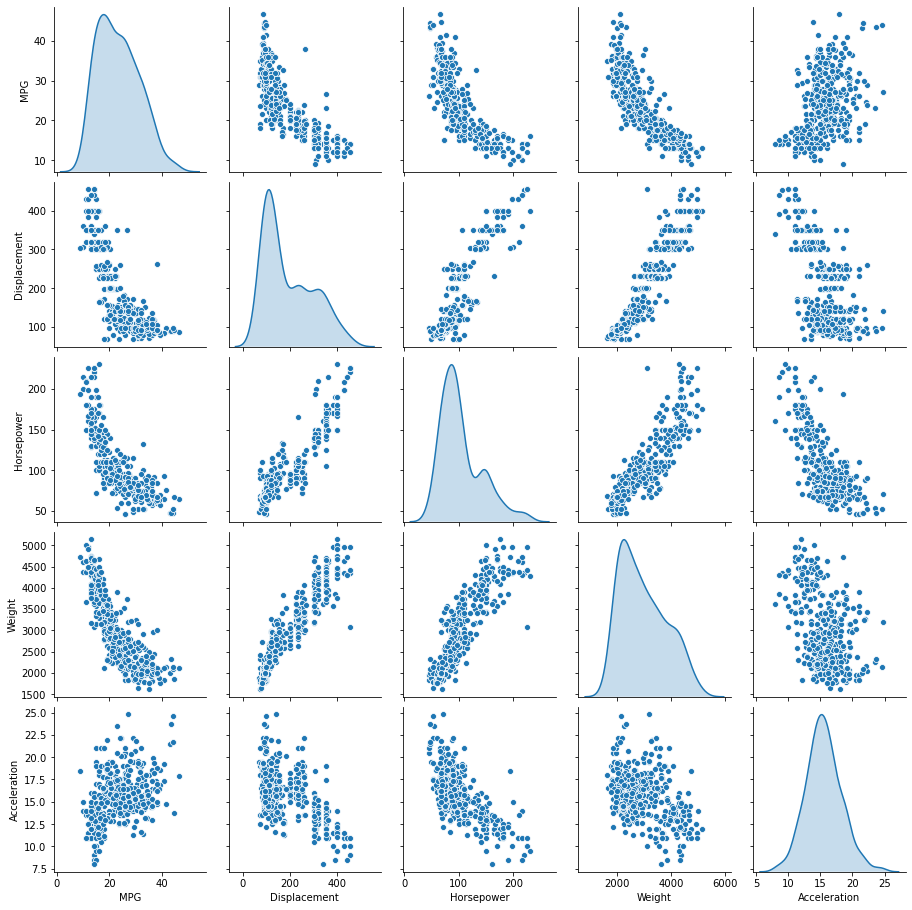

In [ ]:
#### Joint Distribution of a few pairs of columns
sns.pairplot(dataset[['MPG', 'Displacement', 'Horsepower', 'Weight', 'Acceleration']],
             diag_kind="kde")
plt.show()

* **From the above plots it is observed that all the pairs of columns have high correlation between them and most of the columns are normally distributed.**

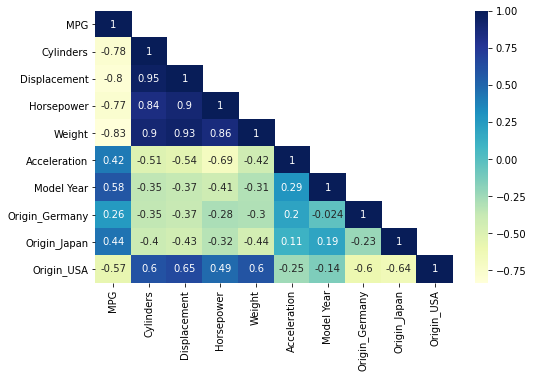

In [ ]:
#### heatmap to visualize the pearson's correlation matrix between the numeric variables
plt.figure(figsize=(8, 5))
sns.heatmap(dataset.corr(), annot=True, cmap="YlGnBu", mask=np.triu(dataset.corr(), k=1))
plt.show()

**From the above heatmap**
* **Cylinders, Displacement, HorsePower, weight are high negitive correlation with MPG.**
* **Cylinders, Displacement, HorsePower, weight are having high positive correlation between them.**

In [ ]:
#### The describe() method shows a summary of the nummerical attributes.
dataset.describe().T.round(decimals = 2)

,count,mean,std,min,25%,50%,75%,max
MPG,398.0,23.51,7.82,9.0,17.50,23.0,29.00,46.6
Cylinders,398.0,5.45,1.70,3.0,4.00,4.0,8.00,8.0
Displacement,398.0,193.43,104.27,68.0,104.25,148.5,262.00,455.0
Horsepower,398.0,104.30,38.22,46.0,76.00,93.5,125.00,230.0
Weight,398.0,2970.42,846.84,1613.0,2223.75,2803.5,3608.00,5140.0
Acceleration,398.0,15.57,2.76,8.0,13.82,15.5,17.17,24.8
Model Year,398.0,76.01,3.70,70.0,73.00,76.0,79.00,82.0
Origin_Germany,398.0,0.18,0.38,0.0,0.00,0.0,0.00,1.0
Origin_Japan,398.0,0.20,0.40,0.0,0.00,0.0,0.00,1.0
Origin_USA,398.0,0.63,0.48,0.0,0.00,1.0,1.00,1.0


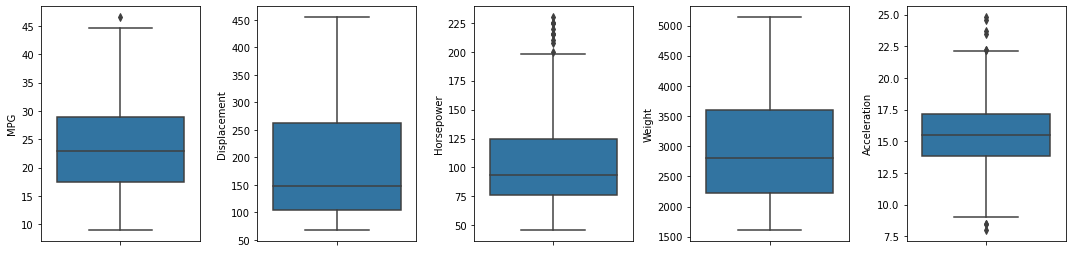

In [ ]:
#### Plotting box plot to check the outliers
plt.figure(figsize=(15, 7))
columns = ['MPG', 'Displacement', 'Horsepower', 'Weight', 'Acceleration']
for i in range(5):
    plt.subplot(2, 5, i+1)
    sns.boxplot(dataset[columns[i]], orient="v")
    
plt.tight_layout()

* **There are very few ouliers present in the dataset which are very nearer to upper boundary. So, there is no need of outliers treatment.**

## Perform appropriate normalization technique

In [ ]:
#### Converting data into dependent and independent variable 
X = dataset.drop('MPG',axis=1)
y = dataset['MPG']

In [ ]:
#### Applying z-score normalization on dataset
cnames=['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year']
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for col in cnames:
    X[col] = sc.fit_transform(X[col].values.reshape(-1,1))
X.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_Germany,Origin_Japan,Origin_USA
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,0,0,1
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,0,0,1
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,0,0,1
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,0,0,1
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,0,0,1


## Divide the data into train and test set with 80:20 ratio.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print(f'Shape of X_train = {X_train.shape}')
print(f'Shape of y_train = {y_train.shape}')
print(f'Shape of X_test = {X_test.shape}')
print(f'Shape of y_test = {y_test.shape}')

Shape of X_train = (318, 9)
Shape of y_train = (318,)
Shape of X_test = (80, 9)
Shape of y_test = (80,)


## Build the NN model with adequate number of hidden layers, appropriate optimizer and loss functions.
* **Building a Sequential model with two densely connected hidden layers, and an output layer that return a single, continuous value.**


In [ ]:
def build_model():
    model = keras.Sequential([
                            layers.Dense(64, activation = 'relu', input_shape = [len(X.keys())]),
                            layers.Dense(64, activation = 'relu'),
                            layers.Dense(1)
  ])
  
    optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001) # default learning rate is 0.001
  
    model.compile(loss = 'mse',
                optimizer = optimizer,
                metrics = ['mae', 'mse', 'mape'])
    return model

model = build_model()

## Display the model summary 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


* **First Layer:** On input, Convolution is applied on 64 filters. We will get output shape as (None, 64)
```python
    Parameters = 9(Features)
               = 9 + 1(Bias)
               = 10 * 64(Number of Filters)
               = 640
```
* **Second Layer:** Another layer with 64 filters. We will get output shape as (None, 64)
```python
    Parameters = 64(Filter size of previous layer)
               = 64 + 1(Bias)
               = 65 * 64(Number of Filters)
               = 4160
```
* **Output Layer:** It return a single, continuous value. We will get output shape as (None, 1)
```python
    Parameters = 64(Filter size of previous layer)
               = 64 + 1(Bias)
               = 65 * 1(Number of Filters)
               = 65
```

Total **Trainable parameters** = 640 + 4160 + 65 = 4865

## Fit the model by taking validation data as 20% of training data.

In [ ]:
#Display the training progress by priniting a single dot for each complted epoch
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs):
        if epoch%500 == 0:print('')
        if epoch%5 == 0:print('.',end='')
EPOCHS = 1000
history = model.fit(X_train, y_train,
                  epochs = EPOCHS, validation_split = 0.2,
                  verbose = 0, callbacks = [PrintDot()]) #calculate print dot


....................................................................................................
....................................................................................................

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,mape,val_loss,val_mae,val_mse,val_mape,epoch
995,2.692003,1.124521,2.692003,4.754991,9.305893,2.402378,9.305893,10.573867,995
996,2.516150,1.131152,2.516150,4.916086,9.523062,2.435962,9.523062,10.934620,996
997,2.643332,1.141908,2.643332,4.833883,10.217016,2.460796,10.217016,10.881972,997
998,2.537250,1.081997,2.537250,4.541018,8.995350,2.360775,8.995350,10.368171,998
999,2.993054,1.196248,2.993054,5.063711,11.315599,2.572569,11.315599,11.351248,999


## Plot the graph of Number of epochs vs/ training and validation loss


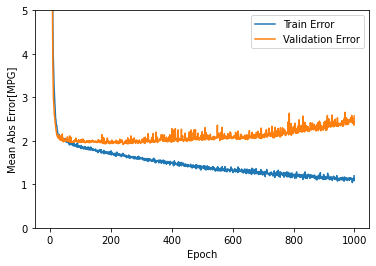

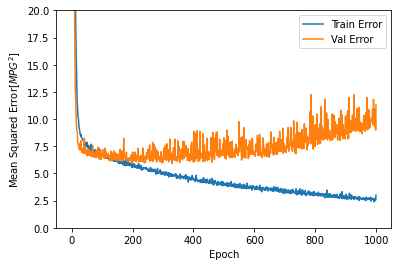

In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error[MPG]') 
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], label='Validation Error')
    plt.ylim([0,5])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error[$MPG^2$]')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label='Val Error')
    plt.ylim([0,20])
    plt.legend()
    plt.show()  
plot_history(history)

* **From the above plot we can say that model is overfitting, so we need to perform early stopping which is used to avoid overfitting problem.**

In [ ]:
#### Applying early stopping method to avoid overfitting
model = build_model()

#### The patience is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)

history = model.fit(X_train, y_train,
                    epochs = EPOCHS, validation_split = 0.2, 
                    verbose = 0, callbacks = [early_stop, PrintDot()])


................

* **Let's re-plot the history to hopefully see the model training stopped before things get worse for the validation data.**

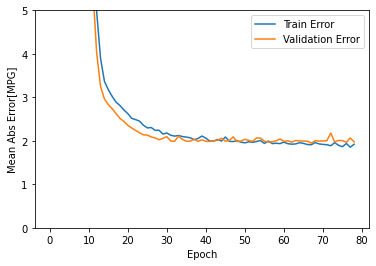

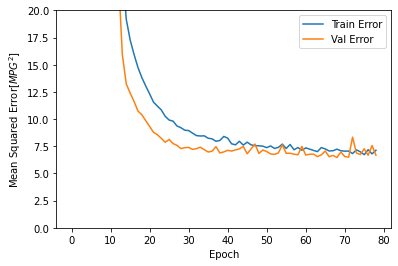

In [ ]:
plot_history(history)

* **From the above plot it is observed that model training stopped after 80 epochs with a less mean absolute error as around 2.**

## Evaluate the model and predict it on testing data

In [ ]:
#### Evaluating the model
mse=model.evaluate(X_test,y_test,verbose=0)
print('Testing set Mean Abs Error:',mse)

Testing set Mean Abs Error: [5.474778652191162, 1.7741016149520874, 5.474778652191162, 8.025993347167969]


In [ ]:
#### Predicting the model
test_predictions=model.predict(X_test).flatten()
train_predictions=model.predict(X_train).flatten()

## Plot between actual values v/s predicted values (regression line and scatter plot)

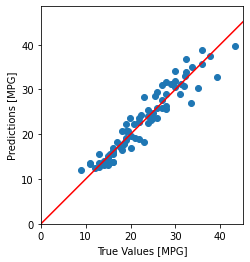

In [ ]:
plt.scatter(y_test,test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([-100,100],[-100,100],color='red')
plt.show()

In [ ]:
#### calculating the mean-squared error, mean absolute error, and the R-Squared error on traing and testing.
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse=mean_squared_error(y_test,test_predictions)
print('MSE is',mse)
mae=mean_absolute_error(y_test,test_predictions)
print('MAE is',mae)
rsq=r2_score(y_train,train_predictions)
print('R-square,Training is',rsq)
rsq=r2_score(y_test,test_predictions)
print('R-square,Testing is',rsq)

MSE is 5.474779962221888
MAE is 1.774101734161377
R-square,Training is 0.8934793065473758
R-square,Testing is 0.9021434141484523


# Conclusion:

&emsp;&emsp;By training Artificial Neural Network predicting Fuel Efficiency for AutoMobile that overcomes overfitting by using early stopping that provides high accuracy of 89% and less mean absolute loss of around 2.

<h1 align='center'>Thank You🙂</h1>